# Data Cleaning

First, we will import some modules that we may need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the data as a Pandas dataframe. It's a tab-separated file so we will need to use '\t' as the delimiter.

In [2]:
data = pd.read_csv('NSDUH-2015-DS0001-data-excel.tsv',sep='\t')

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2501) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# inspecting the data
data.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,25095143,10/20/2016,1,99,99,16,2014,1,2,93,...,1.0,2,2,3,3,2,2,1088.413235,40028,1
1,13005143,10/20/2016,1,99,99,15,9999,99,3,93,...,2.0,1,2,2,2,2,2,4423.360328,40025,1
2,67415143,10/20/2016,2,99,99,991,9991,91,91,91,...,1.0,2,2,2,3,2,2,328.111801,40004,2
3,70925143,10/20/2016,2,3,4,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,235.290450,40027,1
4,75235143,10/20/2016,1,99,99,17,9999,99,1,22,...,1.0,2,2,3,3,2,2,2280.878615,40011,1


# Make the Dictionary with the Corresponding Codes and Meanings

Now, we will make dictionary of the columns we need extract from the DataFrame. I am extracting these codes based on what their corresponding meanings are in the codebook provided in the repository. The keys correspond to the coded names, and the value corresponds to what each means. After, we will use the keys of the dictionary to extract from the DataFrame.

In [4]:
features_dict = {'IRALCRC':'Alcohol Recency','IRMJRC':'Marijuana Recency','IRCOCRC':'Cocaine Recency','IRLSDRC':'LSD Recency',
                'IRALCFY':'# Days Used Alcohol Past Year','IRMJFY':'# Days Used Marijuana Past Year',
                 'IRCOCFY':'# Days Used Cocaine Past Year','IRHALLUCYFQ':'# Days Used Hallucinogens Past Year',
                'IRALCFM':'# Days Used Alcohol Past Month','IRALCBNG30D':'# Days Binge Drank Past Month','IRMJFM':'# Days Used Marijana Past Month',
                'IRCOCFM':'# Days Used Cocaine Past Month','IRHALLUC30N':'# Days Used Hallucinogens Past Month',
                'ALCYDAYS':'# Days Used Alcohol Past Year (Range)','MRJYDAYS':'# Days Used Marijuana Past Year (Range)',
                'COCYDAYS':'# Days Used Cocaine Past Year (Range)','HALLNDAYYR':'# Days Used Hallucinogens Past Year (Range)',
                'ALCMDAYS':'# Days Used Alcohol Past Month (Range)','MRJMDAYS':'# Days Used Marijuana Past Month (Range)',
                'COCMDAYS':'# Days Used Cocaine Past Month (Range)','HALLNDAYPM':'# Days Used Hallucinogens Past Month (Range)',
                'FUALC18':'First Used Alcohol Prior to 18','FUALC21':'First Used Alcohol Prior to 21',
                'FUMJ18':'First Used Marijuana Prior to 18','FUMJ21':'First Used Marijuana Prior to 21','FUCOC18':'First Used Cocaine Prior to 18',
                'FUCOC21':'First Used Cocaine Prior to 21','FUHALLUC18':'First Used Hallucinogens Prior to 18',
                'FUHALLUC21':'First Used Hallucinogens Prior to 21','FULSD18':'First Used LSD Prior to 18',
                'FULSD21':'First Used LSD Prior to 21','DEPNDALC':'Alcohol Dependence in Past Year','DEPNDMRJ':'Marijuana Dependence in Past Year',
                'DEPNDCOC':'Cocaine Dependence in Past Year','DEPNDPYHAL':'Hallucinogen Dependence in Past Year',
                'ABUSEALC':'Alcohol Abuse in Past Year','ABUSEMRJ':'Marijuana Abuse in Past Year',
                'ABUSECOC':'Cocaine Abuse in Past Year','ABUSEPYHAL':'Hallucinogen Abuse in Past Year',
                'AGE2':'Age','K6SCMON':'Psychological Distress Score Past Month','SPDMON':'Severe Psychological Distress Past Month',
                'K6SCMAX':'Psychological Distress Score in Worst Month of Past Year','SPDYR':'Severe Psychological Distress Past Year',
                'SMIYR_U':'Serious Mental Illness in Past Year','MMIYR_U':'Moderate Mental Illness in Past Year',
                'LMIYR_U':'Mild Mental Illness in Past Year','AMDEYR':'Major Depressive Episode in Past Year'}

In [5]:
# turn the keys of the dictionary into a list
important_columns = list(features_dict.keys())
# filter out the columns we are interested in and put them in a new DataFrame
df = data[important_columns]
# rename the columns based on the dictionary
df_renamed = df.rename(index=str,columns=features_dict)

# Filtering Age Range

Now that we have the renamed DataFrame with the columns of interest, we need to filter out the age to get the age range of 18-25 years old. We use the codebook and Boolean Dataframes to do this.

In [6]:
df_age_filtered = df_renamed[(df_renamed['Age']>=7) & (df_renamed['Age']<=12)]
df_age_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14553 entries, 4 to 57143
Data columns (total 48 columns):
# Days Used Alcohol Past Year                               14553 non-null int64
# Days Used Cocaine Past Month                              14553 non-null float64
Major Depressive Episode in Past Year                       14353 non-null float64
# Days Used Marijuana Past Year (Range)                     14553 non-null int64
Cocaine Abuse in Past Year                                  14553 non-null int64
# Days Used Alcohol Past Month                              14553 non-null float64
# Days Used Cocaine Past Year                               14553 non-null int64
Severe Psychological Distress Past Month                    14553 non-null float64
# Days Used Marijuana Past Year                             14553 non-null int64
First Used Marijuana Prior to 18                            14553 non-null int64
Hallucinogen Dependence in Past Year                        14553 non-null int

# Taking care of missing values

After filtering for this age range, we see that every column has 14553 non-null values except for the 'Major Depressive Episode in Past Year' column, which has 14353 (200 are missing). According to the codebook, there are NaN values where the age range is 12-17, or whether the result is unknown. Since we have already filtered for the ages 18-25, we will assume that the unknown result means that the individual did not have a major depressive episode in the past year.

In [7]:
df_age_filtered['Major Depressive Episode in Past Year'].fillna(2,inplace=True)
df_age_filtered

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,Major Depressive Episode in Past Year,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,Severe Psychological Distress Past Month,# Days Used Marijuana Past Year,First Used Marijuana Prior to 18,...,Psychological Distress Score in Worst Month of Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Alcohol Recency,Marijuana Abuse in Past Year,# Days Binge Drank Past Month,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
4,6,91.0,2.0,6,0,93.0,991,0.0,991,2,...,11.0,5,6,2,0,93,2,1,0,5
5,120,91.0,2.0,6,0,8.0,991,0.0,991,2,...,8.0,5,6,1,0,1,1,4,0,3
6,84,91.0,2.0,6,0,3.0,991,0.0,991,2,...,0.0,5,6,1,0,2,2,3,0,2
13,12,91.0,2.0,6,0,93.0,991,0.0,993,1,...,4.0,5,6,2,0,93,2,2,0,5
19,993,91.0,2.0,6,0,93.0,991,0.0,991,2,...,0.0,5,6,3,0,93,1,6,0,5
20,991,91.0,2.0,6,0,91.0,991,0.0,991,2,...,0.0,5,6,9,0,91,2,6,0,5
33,48,91.0,1.0,6,0,4.0,991,0.0,993,1,...,14.0,5,6,1,0,1,1,2,0,2
35,991,91.0,2.0,6,0,91.0,991,0.0,991,2,...,7.0,5,6,9,0,91,2,6,0,5
36,48,91.0,2.0,2,0,93.0,991,0.0,31,2,...,0.0,5,6,2,0,93,1,2,0,5
38,52,91.0,2.0,3,0,11.0,991,0.0,60,1,...,2.0,5,1,1,0,5,1,3,0,3


Let's reindex the DataFrame.

In [8]:
df_age_filtered.reset_index(drop=True,inplace=True)

# Dealing with each individual column to make sure values make sense

Now, we must go through every column to replace the values with their associated meanings. We are using the codebook to do this. We are going to go in the order that the columns are put in in our DataFrame.

Dealing with columns related to # days used substance in past year:

In [9]:
# create a dictionary based on what should be replaced
replaced = {991:0,993:0}
df_age_filtered.replace({'# Days Used Alcohol Past Year':replaced,'# Days Used Marijuana Past Year':replaced,
                        '# Days Used Cocaine Past Year':replaced,
                '# Days Used Hallucinogens Past Year':replaced},inplace=True)

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Noticed typo in column:

In [10]:
df_age_filtered.rename(index=str, columns = {'# Days Used Marijana Past Month':'# Days Used Marijuana Past Month'},inplace=True)

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Dealing with columns related to # days used substance in past month

In [11]:
# create a dictionary based on what should be replaced
replaced = {91:0,93:0}
df_age_filtered.replace({'# Days Used Alcohol Past Month':replaced,'# Days Binge Drank Past Month':replaced,
                        '# Days Used Marijuana Past Month':replaced,'# Days Used Cocaine Past Month':replaced,
                        '# Days Used Hallucinogens Past Month':replaced},inplace=True)

Dealing with columns related to # days used substance past year (range):

In [12]:
# create a dictonary based on what should be replaced
replaced = {1:'1-11',2:'12-49',3:'50-99',4:'100-299',5:'300-365',6:'0'}
df_age_filtered.replace({'# Days Used Alcohol Past Year (Range)':replaced,'# Days Used Marijuana Past Year (Range)':replaced,
                        '# Days Used Cocaine Past Year (Range)':replaced,'# Days Used Hallucinogens Past Year (Range)':replaced},
                       inplace=True)

Dealing with columns related to # days in past month (range)

In [13]:
# create a dictionary based on what should be replaced
replaced = {1:'1-2',2:'3-5',3:'6-19',4:'20-30',5:'0'}
df_age_filtered.replace({'# Days Used Alcohol Past Month (Range)':replaced,'# Days Used Marijuana Past Month (Range)':replaced,
                        '# Days Used Cocaine Past Month (Range)':replaced,'# Days Used Hallucinogens Past Month (Range)':replaced},
                       inplace=True)


Dealing with columns related to age that subjects first tried the substance:

In [14]:
replaced = {1:'Yes',2:'No'}
df_age_filtered.replace({'First Used Alcohol Prior to 18':replaced,'First Used Alcohol Prior to 21':replaced,
                        'First Used Marijuana Prior to 18':replaced,'First Used Marijuana Prior to 21':replaced,
                        'First Used Cocaine Prior to 18':replaced,'First Used Cocaine Prior to 21':replaced,
                        'First Used Hallucinogens Prior to 18':replaced,'First Used Hallucinogens Prior to 21':replaced,
                        'First Used LSD Prior to 18':replaced,'First Used LSD Prior to 21':replaced},inplace=True)
df_age_filtered.head(7)

,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,Major Depressive Episode in Past Year,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,Severe Psychological Distress Past Month,# Days Used Marijuana Past Year,First Used Marijuana Prior to 18,...,Psychological Distress Score in Worst Month of Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Alcohol Recency,Marijuana Abuse in Past Year,# Days Binge Drank Past Month,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
0,6,0.0,2.0,0,0,0.0,0,0.0,0,No,...,11.0,0,0,2,0,0,No,1-11,0,0
1,120,0.0,2.0,0,0,8.0,0,0.0,0,No,...,8.0,0,0,1,0,1,Yes,100-299,0,6-19
2,84,0.0,2.0,0,0,3.0,0,0.0,0,No,...,0.0,0,0,1,0,2,No,50-99,0,3-5
3,12,0.0,2.0,0,0,0.0,0,0.0,0,Yes,...,4.0,0,0,2,0,0,No,12-49,0,0
4,0,0.0,2.0,0,0,0.0,0,0.0,0,No,...,0.0,0,0,3,0,0,Yes,0,0,0
5,0,0.0,2.0,0,0,0.0,0,0.0,0,No,...,0.0,0,0,9,0,0,No,0,0,0
6,48,0.0,1.0,0,0,4.0,0,0.0,0,Yes,...,14.0,0,0,1,0,1,Yes,12-49,0,3-5


Dealing with columns related to substance and abuse:

In [15]:
replaced = {0:'No',1:'Yes'}
df_age_filtered.replace({'Alcohol Dependence in Past Year':replaced,'Marijuana Dependence in Past Year':replaced,
                        'Cocaine Dependence in Past Year':replaced, 'Hallucinogen Dependence in Past Year':replaced,
                        'Alcohol Abuse in Past Year':replaced,'Marijuana Abuse in Past Year':replaced,
                        'Cocaine Abuse in Past Year':replaced,'Hallucinogen Abuse in Past Year':replaced},inplace=True)
df_age_filtered.head(7)

,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,Major Depressive Episode in Past Year,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,Severe Psychological Distress Past Month,# Days Used Marijuana Past Year,First Used Marijuana Prior to 18,...,Psychological Distress Score in Worst Month of Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Alcohol Recency,Marijuana Abuse in Past Year,# Days Binge Drank Past Month,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
0,6,0.0,2.0,0,No,0.0,0,0.0,0,No,...,11.0,0,0,2,No,0,No,1-11,No,0
1,120,0.0,2.0,0,No,8.0,0,0.0,0,No,...,8.0,0,0,1,No,1,Yes,100-299,No,6-19
2,84,0.0,2.0,0,No,3.0,0,0.0,0,No,...,0.0,0,0,1,No,2,No,50-99,No,3-5
3,12,0.0,2.0,0,No,0.0,0,0.0,0,Yes,...,4.0,0,0,2,No,0,No,12-49,No,0
4,0,0.0,2.0,0,No,0.0,0,0.0,0,No,...,0.0,0,0,3,No,0,Yes,0,No,0
5,0,0.0,2.0,0,No,0.0,0,0.0,0,No,...,0.0,0,0,9,No,0,No,0,No,0
6,48,0.0,1.0,0,No,4.0,0,0.0,0,Yes,...,14.0,0,0,1,No,1,Yes,12-49,No,3-5


Dealing with age:

In [16]:
replaced = {7:18,8:19,9:20,10:21,11:'22 or 23',12:'24 or 25'}
df_age_filtered.replace({'Age':replaced},inplace=True)

Dealing with columns related to psychological distress:

In [17]:
replaced = {0:'No',1:'Yes'}
df_age_filtered.replace({'Severe Psychological Distress Past Month':replaced,'Severe Psychological Distress Past Year':replaced,
                        'Serious Mental Illness in Past Year':replaced,'Moderate Mental Illness in Past Year':replaced,
                        'Mild Mental Illness in Past Year':replaced},inplace=True)

Dealing with column related to Major Depressive Episode:

In [18]:
replaced = {1:'Yes',2:'No'}
df_age_filtered.replace({'Major Depressive Episode in Past Year':replaced},inplace=True)

In [19]:
df_age_filtered.head(10)

,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,Major Depressive Episode in Past Year,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,Severe Psychological Distress Past Month,# Days Used Marijuana Past Year,First Used Marijuana Prior to 18,...,Psychological Distress Score in Worst Month of Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Alcohol Recency,Marijuana Abuse in Past Year,# Days Binge Drank Past Month,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
0,6,0.0,No,0,No,0.0,0,No,0,No,...,11.0,0,0,2,No,0,No,1-11,No,0
1,120,0.0,No,0,No,8.0,0,No,0,No,...,8.0,0,0,1,No,1,Yes,100-299,No,6-19
2,84,0.0,No,0,No,3.0,0,No,0,No,...,0.0,0,0,1,No,2,No,50-99,No,3-5
3,12,0.0,No,0,No,0.0,0,No,0,Yes,...,4.0,0,0,2,No,0,No,12-49,No,0
4,0,0.0,No,0,No,0.0,0,No,0,No,...,0.0,0,0,3,No,0,Yes,0,No,0
5,0,0.0,No,0,No,0.0,0,No,0,No,...,0.0,0,0,9,No,0,No,0,No,0
6,48,0.0,Yes,0,No,4.0,0,No,0,Yes,...,14.0,0,0,1,No,1,Yes,12-49,No,3-5
7,0,0.0,No,0,No,0.0,0,No,0,No,...,7.0,0,0,9,No,0,No,0,No,0
8,48,0.0,No,12-49,No,0.0,0,No,31,No,...,0.0,0,0,2,No,0,Yes,12-49,No,0
9,52,0.0,No,50-99,No,11.0,0,No,60,Yes,...,2.0,0,1-11,1,No,5,Yes,50-99,No,6-19


Dealing with substance use recency:

In [20]:
replaced = {1:'Within Past 30 Days',2:'Between 30 Days and a Year Ago',3:'More than a Year Ago',9:'Never Used'}
df_age_filtered.replace({'Alcohol Recency':replaced,'Marijuana Recency':replaced,'Cocaine Recency':replaced,
                         'LSD Recency':replaced},inplace=True)

We have finished dealing with all the columns.

# Exploring the data further for possible outliers/bad data points

Let's explore the summary statistics to see if anything jumps out.

In [21]:
df_age_filtered.describe()

,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,# Days Used Marijuana Past Year,# Days Used Hallucinogens Past Month,Psychological Distress Score Past Month,# Days Used Marijuana Past Month,# Days Used Hallucinogens Past Year,Psychological Distress Score in Worst Month of Past Year,# Days Binge Drank Past Month
count,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.00000,14553.000000
mean,57.804783,0.050883,3.855116,1.113310,41.578369,0.045489,5.609565,2.936164,1.067684,7.13413,1.548203
std,77.375998,0.685372,5.870345,11.297869,97.251140,0.615333,5.110459,7.832433,11.060955,6.46319,3.362149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.00000,0.000000
50%,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,5.00000,0.000000
75%,96.000000,0.000000,5.000000,0.000000,5.000000,0.000000,8.000000,0.000000,0.000000,11.00000,2.000000
max,365.000000,30.000000,30.000000,350.000000,365.000000,30.000000,24.000000,30.000000,365.000000,24.00000,30.000000


All the max values seem to make sense, all of them are plausible and while they may be outliers, we don't want to exclude any subjects that, for example, used alcohol 365 days of the year. In fact, these are the individuals we may want to explore further.

Since hallucinogens are probably the statistic with the most variability, let's explore that a little further to make sure our data will make sense.

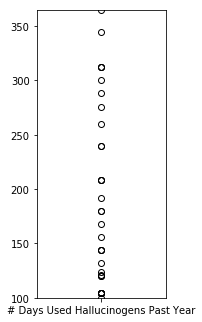

In [22]:
plt.axes([0.1,0.1,0.3,1])
df_age_filtered['# Days Used Hallucinogens Past Year'].plot(kind='box',ylim=(100,365))
plt.show()

As we can see here, there are a several points that would be considered 'outliers' according to the boxplot model, but these are points we certainly want to investigate.

In [23]:
df_age_filtered.to_csv('drugAbuse_data_cleaned.csv',sep=',')